In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
######### START HERE

In [15]:
with open('clean_data.npy', 'rb') as f:
    data = np.load(f)
with open('data_labels.npy', 'rb') as f:
    labels = np.load(f)
with open("data_genres.npy", "rb") as f:
    genres = np.load(f)


In [16]:
print(genres)
print(data.shape)

['hip hop' 'show tunes' 'pop' 'classical' 'rock' 'r&b' 'latin']
(834, 11)


In [17]:
from SOMap import SOMap
from graphics import Presenter

In [32]:
model_size = 12*12
epochs = 40
max_d = 20

n_inputs = data.shape[1]
model = SOMap(n_inputs,model_size, learning_rate=0.2, generosity=0.5)
model_control = SOMap(n_inputs,model_size)
model.set_data(data)
#model.load("music.dat")
model.train(epochs, max_depth=max_d)
#model.save("music.dat")

Estimated time: No idea.. but let me know when you are done!
Epoch:  0
Epoch:  4
Epoch:  8
Epoch:  12
Epoch:  16
Epoch:  20
Epoch:  24
Epoch:  28
Epoch:  32
Epoch:  36


0

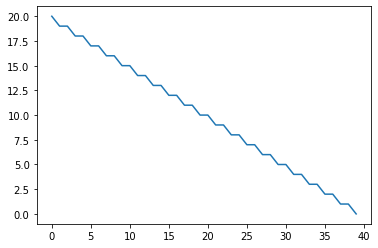

In [33]:
plt.plot(model.depth_hist)
#plt.savefig("depth_144_1000.png", dpi=600)
#print(model.w[0])

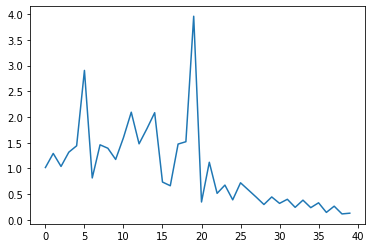

In [34]:
plt.plot(model.change_hist)
#plt.savefig("change_144_1000.png", dpi=600)
#print(model.change_hist[0])

In [35]:
#model.load("music.dat")
#model.train(500, adapt=False)

In [36]:
presenter = Presenter()
presenter_control = Presenter()

presenter.set_model(model)
presenter_control.set_model(model_control)
presenter.set_data(data, [labels], ["Genres"], [genres])
presenter_control.set_data(data, [labels], ["Genres"], [genres])

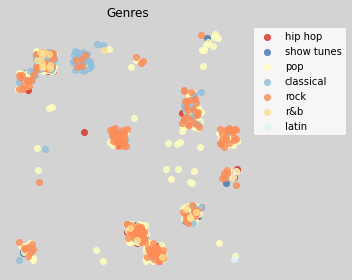

In [37]:
fig = presenter_control.show()
fig.tight_layout()
fig.patch.set_facecolor('lightgray')
plt.savefig("music_control.png", dpi=600)

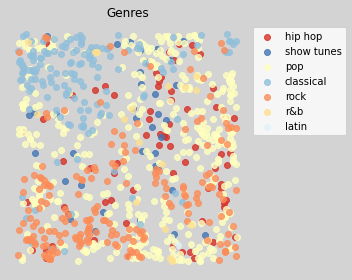

In [38]:
fig = presenter.show()
fig.tight_layout()
fig.patch.set_facecolor('lightgray')
plt.savefig("music.png", dpi=600)